In [11]:
library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(ggplot2)
library(tidyr)
library(ggpubr)

library(patchwork)
library(RColorBrewer)
library(viridis)

# Functional enrichment in genes fully cycling under either leaf SD or leaf LD conditions

Only genes with 2 or more alleles were used

In [12]:
FullCyc_Leaf <- import(file= '../ATL_AllelicGroupRhythmicity/MercatorResults/20250324_FullyCyclingGenesLeaf_SDorLD_vs_CyclingGenesLeaf_SDorLD_2ormoreExprAlleles.tsv', 
sep ='\t', header = TRUE, fill = TRUE)

In [13]:
FullCyc_Leaf[1:1,]

MapMan4 category number Context of Protein Function
1 1                       Photosynthesis             
  #Genes of Interest IN MapMan4 category
1 290                                   
  Genes of Interest (List) IN MapMan4 category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [14]:
colnames(FullCyc_Leaf)

[1] "MapMan4 category number"                     
 [2] "Context of Protein Function"                 
 [3] "#Genes of Interest IN MapMan4 category"      
 [4] "Genes of Interest (List) IN MapMan4 category"
 [5] "#Genes of Interest NOT IN MapMan4 category"  
 [6] "#Background Genes IN MapMan4 category"       
 [7] "#Background Genes NOT IN MapMan4 category"   
 [8] "Enrichment Factor"                           
 [9] "p-value"                                     
[10] "FDR-adjusted p-value"

In [15]:
colnames(FullCyc_Leaf )<-make.names(colnames(FullCyc_Leaf))
colnames(FullCyc_Leaf )

[1] "MapMan4.category.number"                     
 [2] "Context.of.Protein.Function"                 
 [3] "X.Genes.of.Interest.IN.MapMan4.category"     
 [4] "Genes.of.Interest..List..IN.MapMan4.category"
 [5] "X.Genes.of.Interest.NOT.IN.MapMan4.category" 
 [6] "X.Background.Genes.IN.MapMan4.category"      
 [7] "X.Background.Genes.NOT.IN.MapMan4.category"  
 [8] "Enrichment.Factor"                           
 [9] "p.value"                                     
[10] "FDR.adjusted.p.value"

In [16]:
# Need to correct the gene IDs/IDENTIFIERS
#:::::::::::::::::::::::::::::::::::;
#replace multiple patterns in name column
FullCyc_Leaf$Genes.of.Interest..List..IN.MapMan4.category<- gsub('SOLTU.ATL_V', 'Soltu.Atl_v',FullCyc_Leaf$Genes.of.Interest..List..IN.MapMan4.category)
          # gsub('g', 'G',MyList))

# Remove empty spaces
#:::::::::::::::::::::::;
FullCyc_Leaf$Genes.of.Interest..List..IN.MapMan4.category<- sub(" ", "", FullCyc_Leaf$Genes.of.Interest..List..IN.MapMan4.category)


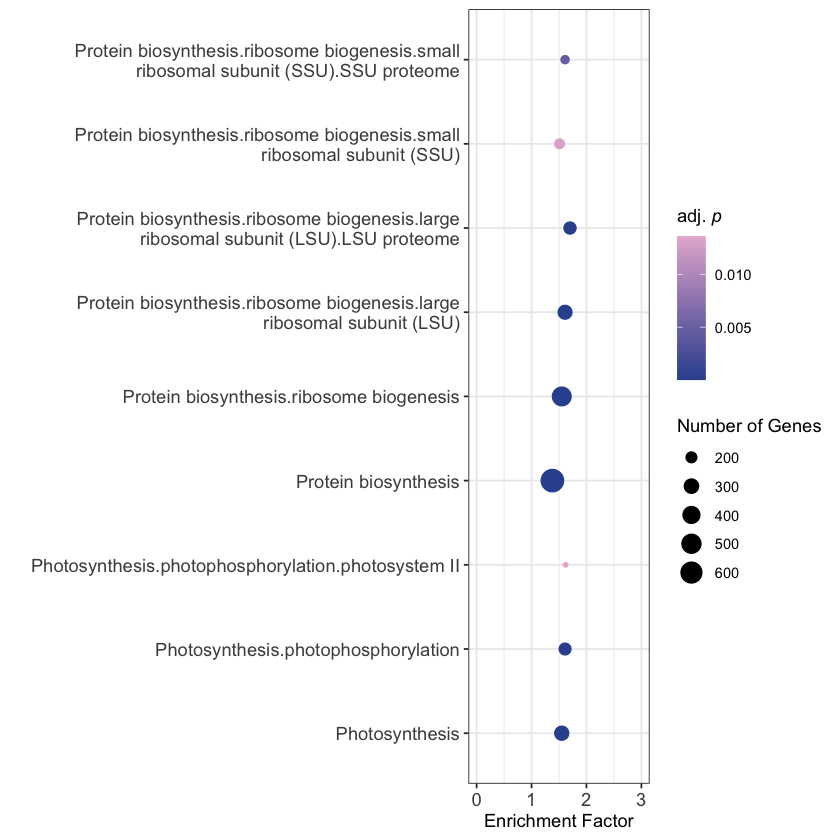

In [17]:
FullCycLeaf_plot<-FullCyc_Leaf%>%  #arrange((MapMan4.category.number)) %>%
                        
                      ggplot(aes(x= Enrichment.Factor,
                                 y=Context.of.Protein.Function,Enrichment.Factor,
                                # y= reorder(Context.of.Protein.Function,Enrichment.Factor), #Change order if needed
                            color= (FDR.adjusted.p.value),
                           size =X.Genes.of.Interest.IN.MapMan4.category )) +
                       geom_point() +
                            coord_cartesian(xlim=c(0,3))+   # change x axis scale
                    scale_color_gradient(low = "#33539E", high = "#E8B7D4", 
                                         name = expression(paste("adj. ", italic("p")))) +
#scale_color_gradient(low = "red", high = "#39568CFF", name = 'adj.p') +
#scale_color_continuous('mako', name = 'adj.p') +
                        scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+  
                            scale_size( name = 'Number of Genes')+    
                              theme_bw() + 
                              ylab("") + 
                              xlab("Enrichment Factor")  +
                        theme(
            axis.title.x = element_text(size = 11),
            axis.title.y = element_text(size = 11),
            axis.text.x=element_text(size = 11),
                              axis.text.y=element_text(size = 11),
      strip.text.x = element_text(size = 11),
        strip.text.y = element_text(size = 11))

FullCycLeaf_plot
                                         

In [18]:
#Export file
#::::::::::::::::
FullCycLeaf_plot%>% ggsave(file="./Results/FullCycLeaf_SDLD_plot.pdf", 
                           
                            width=6.75, height=4.5, dpi=600)

# Functional enrichment of genes with at least 2 h phase delayed in tubers in comparison to leaves

In [19]:
TubDelay2 <- import(file= '../ATL_Diel_Phase_Aplitude_Analyses/Mercator_Results/20250408_TubDelay2_vs_TubExpressed.tsv', 
sep ='\t', header = TRUE, fill = TRUE)

In [20]:
TubDelay2[1:1,]

,MapMan4 category number,Context of Protein Function,#Genes of Interest IN MapMan4 category,Genes of Interest (List) IN MapMan4 category,#Genes of Interest NOT IN MapMan4 category,#Background Genes IN MapMan4 category,#Background Genes NOT IN MapMan4 category,Enrichment Factor,p-value,FDR-adjusted p-value
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,11.3.1.4,Phytohormone action.brassinosteroid.biosynthesis.3-epi-6-deoxocathasterone 23-monooxygenase,2,"Soltu.Atl_v3.10_4G007430.1, Soltu.Atl_v3.02_1G022630.1",243,4,89146,181.94,0.0001114,0.0208


In [21]:
colnames(TubDelay2)

[1] "MapMan4 category number"                     
 [2] "Context of Protein Function"                 
 [3] "#Genes of Interest IN MapMan4 category"      
 [4] "Genes of Interest (List) IN MapMan4 category"
 [5] "#Genes of Interest NOT IN MapMan4 category"  
 [6] "#Background Genes IN MapMan4 category"       
 [7] "#Background Genes NOT IN MapMan4 category"   
 [8] "Enrichment Factor"                           
 [9] "p-value"                                     
[10] "FDR-adjusted p-value"

In [22]:
colnames(TubDelay2 )<-make.names(colnames(TubDelay2))
colnames(TubDelay2 )

[1] "MapMan4.category.number"                     
 [2] "Context.of.Protein.Function"                 
 [3] "X.Genes.of.Interest.IN.MapMan4.category"     
 [4] "Genes.of.Interest..List..IN.MapMan4.category"
 [5] "X.Genes.of.Interest.NOT.IN.MapMan4.category" 
 [6] "X.Background.Genes.IN.MapMan4.category"      
 [7] "X.Background.Genes.NOT.IN.MapMan4.category"  
 [8] "Enrichment.Factor"                           
 [9] "p.value"                                     
[10] "FDR.adjusted.p.value"

In [23]:
# Need to correct the gene IDs/IDENTIFIERS
#:::::::::::::::::::::::::::::::::::;
#replace multiple patterns in name column
TubDelay2$Genes.of.Interest..List..IN.MapMan4.category<- gsub('SOLTU.ATL_V', 'Soltu.Atl_v',TubDelay2$Genes.of.Interest..List..IN.MapMan4.category)
          # gsub('g', 'G',MyList))

# Remove empty spaces
#:::::::::::::::::::::::;
TubDelay2$Genes.of.Interest..List..IN.MapMan4.category<- sub(" ", "", TubDelay2$Genes.of.Interest..List..IN.MapMan4.category)


In [24]:
TubDelay2$MapMan4.category.number

[1] "11.3.1.4"           "11.7.2.2.2"         "15"                
 [4] "15.5"               "15.5.2.3"           "15.5.3"            
 [7] "15.5.3.2"           "15.5.3.2.2"         "15.5.4"            
[10] "15.5.4.5"           "15.5.4.5.1"         "15.5.4.5.1.1"      
[13] "15.5.4.5.2"         "15.5.4.5.4"         "15.5.4.5.5"        
[16] "16.3.2"             "16.3.2.5"           "19.2.2.1.1"        
[19] "19.2.2.12.5.3.20"   "19.2.2.12.5.3.20.2" "2.4.5.3.6"         
[22] "21.4.2.2"           "22.6.2.3"           "26.1"              
[25] "26.1.4"             "26.1.4.1"           "26.1.4.1.2"        
[28] "27"                 "27.1"               "27.1.6"            
[31] "27.1.6.1"           "27.1.6.2"           "27.1.6.4.1"        
[34] "27.3.3"             "29"                 "29.4"              
[37] "29.4.1"             "29.4.1.1"           "29.4.1.2"          
[40] "3.2"                "3.2.2.4.1"          "5.8"               
[43] "5.8.6"              "50.1.13"            "6.2.4.3"           
[46] "7.7"                "7.7.1"              "7.7.1.1"           
[49] "8.2"                "8.2.1"              "9.2.2.3"           
[52] "9.2.2.3.1"

In [25]:

## Selected most informative MapMan categories for plot
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SummarizedCategories <- c(

    '11.3.1.4','11.7.2.2.2','15.5.2.3','15.5.3','15.5.4','16.3.2.5','19.2.2.1.1','19.2.2.12.5.3.20','2.4.5.3.6','21.4.2.2','22.6.2.3','26.1.4.1.2','27.1','27.3.3','29.4.1','3.2','5.8','50.1.13','6.2.4.3','7.7','8.2')



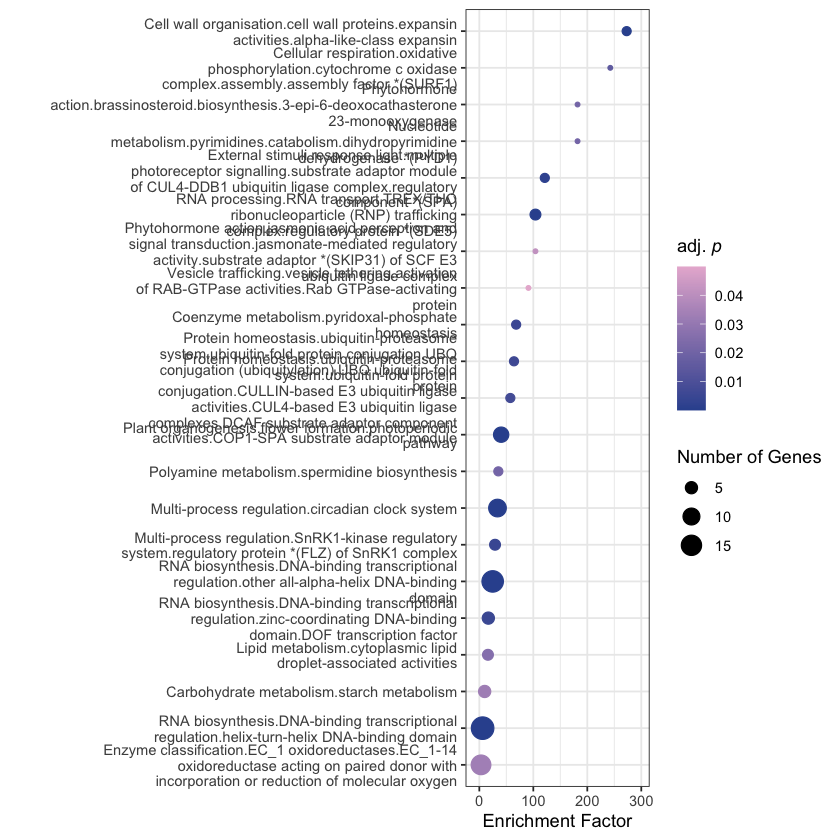

In [26]:
TubDelay2_plot<-TubDelay2%>%  filter(MapMan4.category.number %in% SummarizedCategories) %>% 
                        

                 ggplot(aes(x= Enrichment.Factor, y= reorder(Context.of.Protein.Function,Enrichment.Factor),
                            color= (FDR.adjusted.p.value),
                           size =X.Genes.of.Interest.IN.MapMan4.category )) +
                       geom_point() +
                        coord_cartesian(xlim=c(-10,300))+
                      #scale_color_gradient(low = "red", high = "blue", name = 'adj.p') +
scale_color_gradient(low = "#33539E", high = "#E8B7D4", 
                     name = expression(paste("adj. ", italic("p")))) +
                        scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+  
                            scale_size( name = 'Number of Genes')+    
                              theme_bw() + 
                              ylab("") + 
                              xlab("Enrichment Factor")  

TubDelay2_plot
                                         

In [27]:
#Export file
#::::::::::::::::
TubDelay2_plot%>% ggsave(file="./Results/TubDelay2_plot.pdf", 
                             width=10, height=14, dpi=600)

# Functional enrichment of transcripts with at least 6 h delay in photoperiods

In [28]:
LD_delay_6h <- import(file= '../ATL_Diel_Phase_Aplitude_Analyses/Mercator_Results/20250420_Leaf_LD_delay_6h_VS_Leaf_SDandLD_rhythmic.tsv', 
sep ='\t', header = TRUE, fill = TRUE)

In [29]:
LD_delay_6h[1:2,]

,MapMan4 category number,Context of Protein Function,#Genes of Interest IN MapMan4 category,Genes of Interest (List) IN MapMan4 category,#Genes of Interest NOT IN MapMan4 category,#Background Genes IN MapMan4 category,#Background Genes NOT IN MapMan4 category,Enrichment Factor,p-value,FDR-adjusted p-value
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,15.5.7.5,RNA biosynthesis.DNA-binding transcriptional regulation.beta-hairpin exposed by alpha/beta-scaffold structure.WRKY transcription factor activity,10,"SOLTU.ATL_V3.05_4G018150.1, SOLTU.ATL_V3.04_4G014110.1, SOLTU.ATL_V3.04_0G011690.1, SOLTU.ATL_V3.09_4G008480.4, SOLTU.ATL_V3.05_1G002610.3, SOLTU.ATL_V3.09_0G007230.4, SOLTU.ATL_V3.05_3G019010.1, SOLTU.ATL_V3.04_2G011580.1, SOLTU.ATL_V3.05_3G019000.1, SOLTU.ATL_V3.04_3G013380.1",706,15,8576,8,7.691e-06,0.00166
2,15.5.7.5.1,RNA biosynthesis.DNA-binding transcriptional regulation.beta-hairpin exposed by alpha/beta-scaffold structure.WRKY transcription factor activity.transcription factor *(WRKY),10,"SOLTU.ATL_V3.05_4G018150.1, SOLTU.ATL_V3.04_4G014110.1, SOLTU.ATL_V3.04_0G011690.1, SOLTU.ATL_V3.09_4G008480.4, SOLTU.ATL_V3.05_1G002610.3, SOLTU.ATL_V3.09_0G007230.4, SOLTU.ATL_V3.05_3G019010.1, SOLTU.ATL_V3.04_2G011580.1, SOLTU.ATL_V3.05_3G019000.1, SOLTU.ATL_V3.04_3G013380.1",706,15,8576,8,7.691e-06,0.00166


In [30]:
colnames(LD_delay_6h )<-make.names(colnames(LD_delay_6h))
colnames(LD_delay_6h)

[1] "MapMan4.category.number"                     
 [2] "Context.of.Protein.Function"                 
 [3] "X.Genes.of.Interest.IN.MapMan4.category"     
 [4] "Genes.of.Interest..List..IN.MapMan4.category"
 [5] "X.Genes.of.Interest.NOT.IN.MapMan4.category" 
 [6] "X.Background.Genes.IN.MapMan4.category"      
 [7] "X.Background.Genes.NOT.IN.MapMan4.category"  
 [8] "Enrichment.Factor"                           
 [9] "p.value"                                     
[10] "FDR.adjusted.p.value"

In [31]:
# Need to correct the gene IDs/IDENTIFIERS
#:::::::::::::::::::::::::::::::::::;
#replace multiple patterns in name column
LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category<- gsub('SOLTU.ATL_V', 'Soltu.Atl_v',LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category)
          # gsub('g', 'G',MyList))

# Remove empty spaces
#:::::::::::::::::::::::;
LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category<- sub(" ", "", LD_delay_6h$Genes.of.Interest..List..IN.MapMan4.category)


In [32]:
# Selected major enriched MapMan subcategories for plot
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SummarizedCategories <- c('15.5.7.5','17.1','26.10','6.2.4')

   




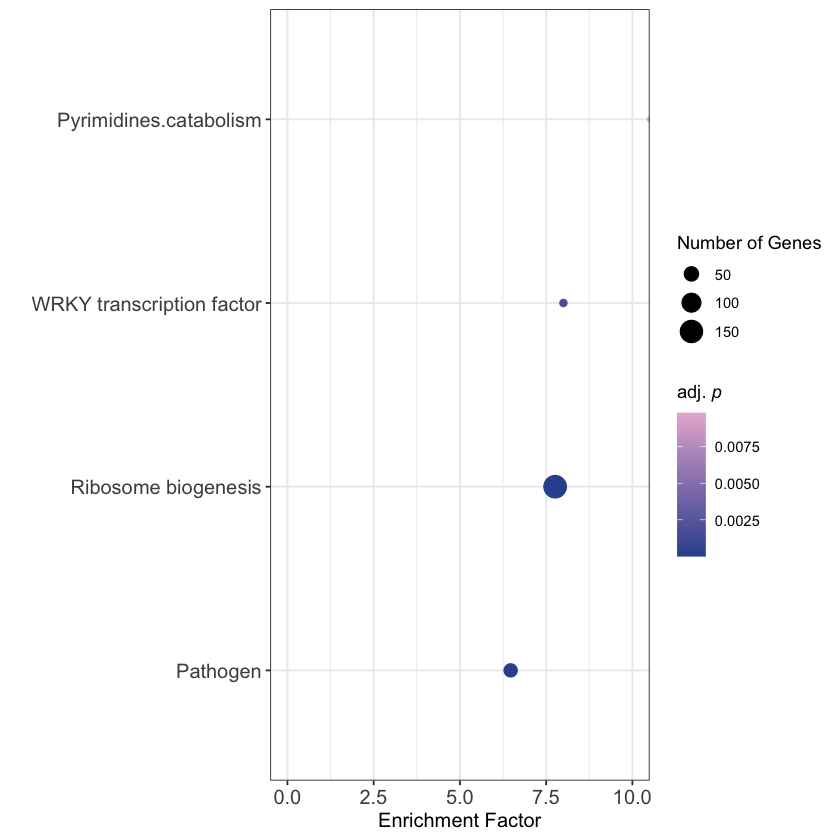

In [34]:



LD_delay_6h_plot<- LD_delay_6h %>%  filter(MapMan4.category.number %in% SummarizedCategories) %>% 
                        #Abbreviate Context text
                        mutate(Brief.Context = case_when(MapMan4.category.number =='15.5.7.5' ~ 'WRKY transcription factor',
                                                         MapMan4.category.number =='17.1' ~ 'Ribosome biogenesis',
                                                         MapMan4.category.number =='26.10' ~ 'Pathogen',
                                                         MapMan4.category.number =='6.2.4' ~ 'Pyrimidines.catabolism')) %>%
                                                         
                        

                 ggplot(aes(x= Enrichment.Factor, y= reorder(Brief.Context,Enrichment.Factor),
                            color= (FDR.adjusted.p.value),
                           size =X.Genes.of.Interest.IN.MapMan4.category )) +
                       geom_point() +
                        coord_cartesian(xlim=c(0,10))+
                      #scale_color_gradient(low = "red", high = "blue", name = 'adj.p') +
scale_color_gradient(low = "#33539E", high = "#E8B7D4", 
                     name = expression(paste("adj. ", italic("p")))) +
                        scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+  
                            scale_size( name = 'Number of Genes')+    
                              theme_bw() + 
                              ylab("") + 
                              xlab("Enrichment Factor")  +
                                          theme(
            axis.title.x = element_text(size = 12),
            axis.title.y = element_text(size = 12),
            axis.text.x=element_text(size = 12),
                              axis.text.y=element_text(size = 12),
      strip.text.x = element_text(size = 12),
        strip.text.y = element_text(size = 12))


LD_delay_6h_plot
                 

In [35]:
LD_delay_6h_plot%>% ggsave(file="./Results/LD_delay_6h_plot.pdf", 
                            width=6, height=3.2, dpi=600)
